In [1]:
import numpy as np
from scipy.cluster.hierarchy import linkage, cophenet, dendrogram
from sklearn.metrics import silhouette_score
from utils import *
from data_pipeline import load_data, split_replicates
import matplotlib.pyplot as plt
import seaborn as sns
from clustering import *

In [2]:
expr, gene_symbols, sample_names = load_data()

Found 4297 genes in datafile
Found 1208 genes in CRP regulatory network
Selecting 1076 genes ...


# Hierarchical clustering on full expression matrix

In [3]:
# Perform hierarchical clustering on full expression matrix
l_matrix = hierarchical_clustering(expr)
y = 1 - correlations_list(expr, expr)
c, d = cophenet(l_matrix, y)
print('Cophenetic coefficient full dendrogram wrt. the original distance matrix: {}'.format(c))

Cophenetic coefficient full dendrogram wrt. the original distance matrix: 0.5113830602702356


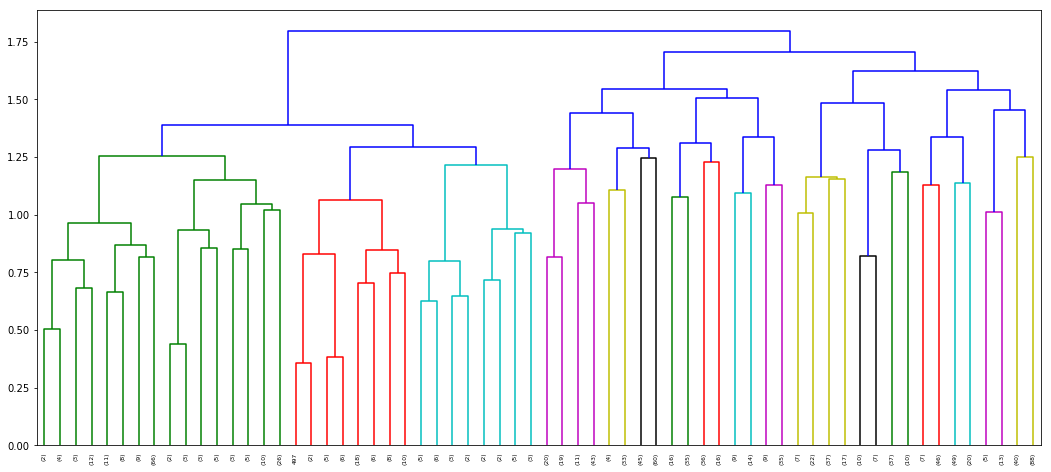

In [4]:
plt.figure(figsize=(18, 8))
dendrogram(l_matrix, p=5, truncate_mode='level');

# Hierarchical clustering on full expression matrix

In [5]:
idxs1, idxs2 = split_replicates(sample_names)
print('Set lengths: {} and {}'.format(len(idxs1), len(idxs2)))

gamma_dx_dz, gamma_dx_tx, gamma_dz_tz, gamma_tx_tz = gamma_coefficients(expr[idxs1, :], expr[idxs2, :])
print('Gamma(D^X, D^Z): {}'.format(gamma_dx_dz))
print('Gamma(D^X, T^X): {}'.format(gamma_dx_tx))
print('Gamma(D^Z, T^Z): {}'.format(gamma_dz_tz))
print('Gamma(T^X, T^Z): {}'.format(gamma_tx_tz))

Set lengths: 441 and 466
Gamma(D^X, D^Z): 0.9018159189602594
Gamma(D^X, T^X): 0.5290587407138223
Gamma(D^Z, T^Z): 0.5357956707711304
Gamma(T^X, T^Z): 0.4291850533362623


# Silhouette histogram for full dendrogram

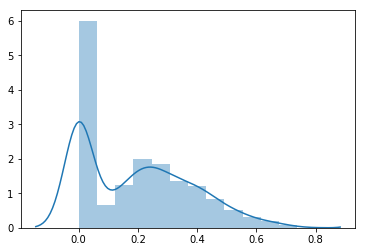

In [9]:
l_matrix = hierarchical_clustering(expr)
silhouettes = compute_silhouette(expr, l_matrix)
sns.distplot(silhouettes);

# Silhouette histogram for full dendrogram

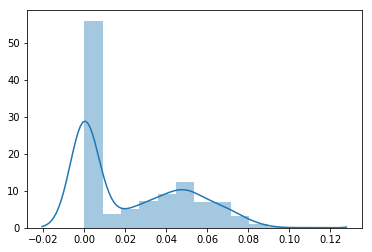

In [10]:
random_noise = np.random.uniform(4, 14, expr.shape)
l_matrix_rand = hierarchical_clustering(random_noise)
silhouettes_rand = compute_silhouette(random_noise, l_matrix_rand)
sns.distplot(silhouettes_rand);

# Example motivating the dendrogram distance metric

In [11]:
q = 10
dx = np.array([[1, 2, q], [2, 1, 3], [q, 3, 1.0]])
dz = np.array([[1, 3, q], [3, 1, 2], [q, 2, 1.0]])
dx_ = upper_diag_list(dx)
dz_ = upper_diag_list(dz)
print('Distance matrices Pearson correlation: {}'.format(pearson_correlation(dx_, dz_)))
lx = linkage(dx_, 'complete')
lz = linkage(dz_, 'complete')
print('Dendrogram distance: {}'.format(compare_cophenetic(lx, lz)))

Distance matrices Pearson correlation: 0.9736842105263159
Dendrogram distance: -0.5


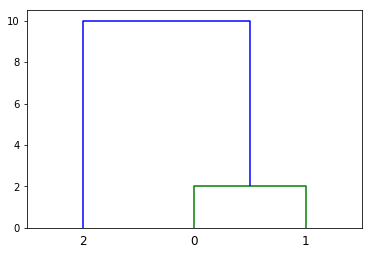

In [12]:
dendrogram(lx);

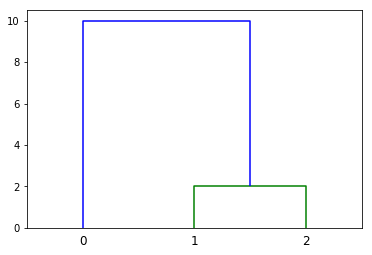

In [13]:
dendrogram(lz);